# Sequence 10 : pandas

Un des meilleurs outils de manipulation de tableau hétérogène.

Il permet de manipule de grand tableau avec des label pour les ligens et les colonnes.

Très adapté aux stats.

L'idée vient de language R.

DataFrame = Tableau de data 2D

Series = colonne de data 1D










In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Series = 1D

In [3]:
s = pd.Series([7, 'yep', 'yop', 20.60])
s

0       7
1     yep
2     yop
3    20.6
dtype: object

In [4]:
s = pd.Series(['sam', 'garcia', 75000.],
              index=['prenom', 'nom', 'salaire_annuel'])
s

prenom               sam
nom               garcia
salaire_annuel     75000
dtype: object

In [4]:
s['nom']

'garcia'

In [6]:
s['nom'] = 'Garcia'
s

prenom               sam
nom               Garcia
salaire_annuel     75000
dtype: object

In [7]:
s.values

array(['sam', 'Garcia', 75000.0], dtype=object)

In [8]:
s.index

Index(['prenom', 'nom', 'salaire_annuel'], dtype='object')

In [8]:
# Filtrage

In [9]:
d = {'OFC':10., 'PRL' : 50., 'APC' : 12.46, 'CA1': np.nan, 'DG':  20.6}
nb_cell = pd.Series(d)
print(nb_cell)



APC    12.46
CA1      NaN
DG     20.60
OFC    10.00
PRL    50.00
dtype: float64


In [10]:
nb_cell[nb_cell>15.]

DG     20.6
PRL    50.0
dtype: float64

In [11]:
over_thresh = nb_cell>15.
over_thresh

APC    False
CA1    False
DG      True
OFC    False
PRL     True
dtype: bool

In [11]:
'DG' in nb_cell

True

 ## c'est comme numpy : opérateur possible

In [13]:
square = nb_cell**2
square

APC     155.2516
CA1          NaN
DG      424.3600
OFC     100.0000
PRL    2500.0000
dtype: float64

In [12]:
zscore = (nb_cell-nb_cell.mean())/nb_cell.std()
zscore

APC   -0.587549
CA1         NaN
DG    -0.144916
OFC   -0.721318
PRL    1.453783
dtype: float64

## missing values

In [15]:
nb_cell.isnull()

APC    False
CA1     True
DG     False
OFC    False
PRL    False
dtype: bool

In [16]:
nb_cell.notnull()

APC     True
CA1    False
DG      True
OFC     True
PRL     True
dtype: bool

In [17]:
nb_cell[nb_cell.notnull()]

APC    12.46
DG     20.60
OFC    10.00
PRL    50.00
dtype: float64

# DataFrame = 2D

C'est un tableau avec chaque colonne = une Series



In [15]:
data = {
    'name':['manu', 'sam', 'david'],
    'sex' : [ 'F', 'M', 'M'],
    'alcohol_consumption' : [False, True, True],
    'drug_consumption' : [True, np.nan,  False],
    'coding_level' : [ 83.5, 100., 19.3],
}

formateur = pd.DataFrame(data, columns=['name', 'sex', 'alcohol_consumption', 'drug_consumption', 'coding_level'])
formateur




,name,sex,alcohol_consumption,drug_consumption,coding_level
0,manu,F,False,True,83.5
1,sam,M,True,NaN,100.0
2,david,M,True,False,19.3


index plus explicit

In [16]:
formateur.index = ['er', 'sg',  'dm']
formateur

,name,sex,alcohol_consumption,drug_consumption,coding_level
er,manu,F,False,True,83.5
sg,sam,M,True,NaN,100.0
dm,david,M,True,False,19.3


# inspection

In [17]:
formateur.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, er to dm
Data columns (total 5 columns):
name                   3 non-null object
sex                    3 non-null object
alcohol_consumption    3 non-null bool
drug_consumption       2 non-null object
coding_level           3 non-null float64
dtypes: bool(1), float64(1), object(3)
memory usage: 123.0+ bytes


In [24]:
formateur.dtypes

name                    object
sex                     object
alcohol_consumption       bool
drug_consumption        object
coding_level           float64
dtype: object

In [25]:
formateur.columns

Index(['name', 'sex', 'alcohol_consumption', 'drug_consumption',
       'coding_level'],
      dtype='object')

In [18]:
formateur.index

Index(['er', 'sg', 'dm'], dtype='object')

In [21]:
formateur.describe()

,coding_level
count,3.000000
mean,67.600000
std,42.634845
min,19.300000
25%,51.400000
50%,83.500000
75%,91.750000
max,100.000000


## selectionner une colone

par dict ou attribut

In [29]:
print(formateur['name'])
print(formateur.name)
print(type(formateur.name))

er     manu
sg      sam
dm    david
Name: name, dtype: object
er     manu
sg      sam
dm    david
Name: name, dtype: object
<class 'pandas.core.series.Series'>


## selectionner plusieurs colonnes

In [26]:
formateur[['alcohol_consumption', 'drug_consumption']]


,alcohol_consumption,drug_consumption
er,False,True
sg,True,NaN
dm,True,False


## la vrai syntax pour selectionner : DataFrame.loc[]

In [29]:
# colonne
formateur.loc[:, ['alcohol_consumption', 'drug_consumption']]

,alcohol_consumption,drug_consumption
er,False,True
sg,True,NaN
dm,True,False


In [30]:
# ligne
formateur.loc[['sg', 'dm'], :]

,name,sex,alcohol_consumption,drug_consumption,coding_level
sg,sam,M,True,NaN,100.0
dm,david,M,True,False,19.3


In [31]:
formateur.loc[['sg', 'dm'], ['alcohol_consumption', 'drug_consumption']]

,alcohol_consumption,drug_consumption
sg,True,NaN
dm,True,False


## syntax pour selectionner par compteur : DataFrame.iloc[]

C'est comme numpy en 2D!!!

In [32]:
# colonne
formateur.loc[:, ['alcohol_consumption', 'drug_consumption']]
formateur.iloc[:, 2:4]


,alcohol_consumption,drug_consumption
er,False,True
sg,True,NaN
dm,True,False


In [34]:
# ligne
formateur.iloc[::2, :]

,name,sex,alcohol_consumption,drug_consumption,coding_level
er,manu,F,False,True,83.5
dm,david,M,True,False,19.3


In [36]:
formateur.iloc[::2, 2:4]

,alcohol_consumption,drug_consumption
er,False,True
dm,True,False


## selectioner par condition





In [37]:
f = formateur[formateur['coding_level']>80.]
f = formateur[formateur.coding_level>80.]
f

,name,sex,alcohol_consumption,drug_consumption,coding_level
er,manu,F,False,True,83.5
sg,sam,M,True,NaN,100.0


In [38]:
f = formateur[formateur.alcohol_consumption]
f

,name,sex,alcohol_consumption,drug_consumption,coding_level
sg,sam,M,True,NaN,100.0
dm,david,M,True,False,19.3


In [39]:
f = formateur[formateur.drug_consumption.isnull()]
f

,name,sex,alcohol_consumption,drug_consumption,coding_level
sg,sam,M,True,NaN,100.0


# lecure depuis fichier : XLS, CSV, (database, clipboard, ...)

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html#pandas.read_excel


In [41]:

data = pd.read_csv('../data/dataset_titanic.csv', sep=',', header=0, encoding='utf8')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [42]:
data = pd.read_excel('../data/dataset_titanic.xlsx', sheet_name='train')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [43]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
#data = data.set_index('PassengerId')
data.set_index('PassengerId', inplace=True)
data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# export vers excel

In [45]:
data = {
    'name':['manu', 'sam', 'david'],
    'sex' : [ 'F', 'M', 'M'],
    'alcohol_consumption' : [False, True, True],
    'drug_consumption' : [True, np.nan,  False],
    'coding_level' : [ 73.5,100., 19.3,],
}

formateur = pd.DataFrame(data, columns=['name', 'sex', 'alcohol_consumption', 'drug_consumption', 'coding_level'])
formateur

,name,sex,alcohol_consumption,drug_consumption,coding_level
0,manu,F,False,True,73.5
1,sam,M,True,NaN,100.0
2,david,M,True,False,19.3


In [46]:
formateur2 = formateur[['sex', 'alcohol_consumption', 'drug_consumption', 'coding_level']]
formateur2

,sex,alcohol_consumption,drug_consumption,coding_level
0,F,False,True,73.5
1,M,True,NaN,100.0
2,M,True,False,19.3


In [47]:
writer = pd.ExcelWriter('formateur.xlsx')
formateur.to_excel(writer, sheet_name='avec nom')
formateur2.to_excel(writer, sheet_name='anonyme')
writer.save()

# export vers hdf5

In [50]:
store = pd.HDFStore('allmydata.h5')
store['formateur'] = formateur
store['formateur2'] = formateur2
store.close()


/home/sgarcia/.virtualenvs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['name', 'sex', 'drug_consumption']]

  exec(code_obj, self.user_global_ns, self.user_ns)
/home/sgarcia/.virtualenvs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['sex', 'drug_consumption']]

  exec(code_obj, self.user_global_ns, self.user_ns)


# groupby

![title](img/groupby.png)

Source: Gratuitously borrowed from Hadley Wickham's Data Science in R slides


In [51]:
from pandas_datareader  import wb
indicator = ['NY.GDP.PCAP.KD', 'IT.MOB.COV.ZS']
data = wb.download(indicator=indicator, country='all', start=2005, end=2011).dropna()
data.columns = ['gdp', 'cellphone']
data.reset_index(inplace=True)
data

,country,year,gdp,cellphone
0,Algeria,2007,4364.224097,81.50
1,Algeria,2006,4285.955530,63.60
2,Algeria,2005,4275.952432,41.52
3,Angola,2006,3010.065391,40.00
4,Benin,2011,733.864893,99.00
5,Benin,2010,732.953623,90.00
6,Benin,2009,738.639032,82.00
7,Benin,2008,743.412827,79.00
8,Benin,2007,730.372939,75.00
9,Benin,2006,710.658094,70.00


In [53]:
data.describe()

,gdp,cellphone
count,221.000000,221.000000
mean,2209.056497,74.694344
std,2617.966371,24.346380
min,208.649727,0.770000
25%,553.597458,62.000000
50%,1128.960195,82.000000
75%,2705.786367,92.200000
max,11967.362347,100.000000


In [55]:
grouped = data.groupby('country')
grouped

In [56]:
mgdp = grouped['gdp'].mean()
mgdp

country
Algeria                      4308.710686
Angola                       3010.065391
Benin                         727.916030
Botswana                     6105.132945
Burkina Faso                  520.370699
Burundi                       212.108127
Cameroon                     1132.429707
Central African Republic      436.851356
Chad                          838.091130
Comoros                       793.750361
Congo, Dem. Rep.              298.955627
Congo, Rep.                  2824.215391
Cote d'Ivoire                1218.492452
Djibouti                     1275.346765
Egypt, Arab Rep.             2466.053045
Eritrea                       472.314776
Ethiopia                      242.283258
Gabon                        9595.309980
Gambia, The                   519.486322
Ghana                        1239.192824
Guinea                        441.642254
Guinea-Bissau                 492.743719
Kenya                         950.286687
Lesotho                      1088.960788
Liberia 

In [57]:
grouped['cellphone'].mean()

country
Algeria                     62.206667
Angola                      40.000000
Benin                       76.857143
Botswana                    98.400000
Burkina Faso                43.550000
Burundi                     81.666667
Cameroon                    56.000000
Central African Republic    37.400000
Chad                        40.933333
Comoros                     40.000000
Congo, Dem. Rep.            50.000000
Congo, Rep.                 71.600000
Cote d'Ivoire               79.216667
Djibouti                    85.000000
Egypt, Arab Rep.            97.471429
Eritrea                     55.075000
Ethiopia                    10.000000
Gabon                       78.333333
Gambia, The                 75.000000
Ghana                       71.742857
Guinea                      80.000000
Guinea-Bissau               65.000000
Kenya                       78.514286
Lesotho                     53.000000
Liberia                      0.770000
Libya                       84.350000
Mada

In [62]:
m = data.groupby('year')[['gdp', 'cellphone']].mean()
m

,gdp,cellphone
year,,
2005,2060.684215,58.742632
2006,2148.864409,63.418085
2007,2648.508994,76.334815
2008,2108.593126,83.386538
2009,2481.294259,84.829630
2010,1817.462172,86.276923
2011,2277.224431,84.396333


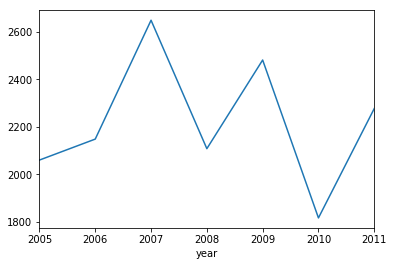

In [64]:
m['gdp'].plot()

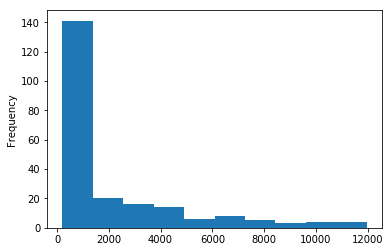

In [65]:
data.gdp.plot.hist(bins=10)

# stack /unstack 

In [70]:
data2 = data.iloc[:20][['country', 'year', 'gdp']]
data2.set_index([ 'country','year', ], inplace=True)
data2

#data2.loc[('Sub-Saharan Africa (all income levels)', 2011), : ]
#dataz.iloc[0,:]

#data2.index


gdp
country      year             
Algeria      2007  4364.224097
             2006  4285.955530
             2005  4275.952432
Angola       2006  3010.065391
Benin        2011   733.864893
             2010   732.953623
             2009   738.639032
             2008   743.412827
             2007   730.372939
             2006   710.658094
             2005   705.510804
Botswana     2011  6488.966235
             2008  6481.134067
             2007  6218.447260
             2006  5848.412617
             2005  5488.704548
Burkina Faso 2006   528.279929
             2005   512.461469
Burundi      2009   213.720096
             2008   213.954557

In [71]:
data3 = data2.unstack('year')
data3

gdp                                                     \
year                 2005         2006         2007         2008        2009   
country                                                                        
Algeria       4275.952432  4285.955530  4364.224097          NaN         NaN   
Angola                NaN  3010.065391          NaN          NaN         NaN   
Benin          705.510804   710.658094   730.372939   743.412827  738.639032   
Botswana      5488.704548  5848.412617  6218.447260  6481.134067         NaN   
Burkina Faso   512.461469   528.279929          NaN          NaN         NaN   
Burundi               NaN          NaN          NaN   213.954557  213.720096   

                                       
year                2010         2011  
country                                
Algeria              NaN          NaN  
Angola               NaN          NaN  
Benin         732.953623   733.864893  
Botswana             NaN  6488.966235  
Burkina Faso         NaN          NaN  
Burundi              NaN          NaN

# merge/concat/alignement

pd.concat permet de concatener des tableaux

Attention pandas aligne tout seul data en fonction des l'index.
Il remplit tout seul les missing values.


In [72]:
m1 = pd.DataFrame(np.arange(15).reshape(5,3), columns=['a', 'b', 'c'], index=[12., 12.8, 14.2, 21.2, 4.])
print(m1)
m2 = pd.DataFrame(np.arange(9).reshape(3,3), columns=['b', 'c', 'd'], index=[15., 23., 18.3])
print(m2)

       a   b   c
12.0   0   1   2
12.8   3   4   5
14.2   6   7   8
21.2   9  10  11
4.0   12  13  14
      b  c  d
15.0  0  1  2
23.0  3  4  5
18.3  6  7  8


In [76]:
pd.concat([m1,m2], axis=0)

,a,b,c,d
12.0,0.0,1,2,NaN
12.8,3.0,4,5,NaN
14.2,6.0,7,8,NaN
21.2,9.0,10,11,NaN
4.0,12.0,13,14,NaN
15.0,NaN,0,1,2.0
23.0,NaN,3,4,5.0
18.3,NaN,6,7,8.0
